In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
import seaborn as sns
import seaborn.objects as so


In [39]:
#Natacha Robbins Hypothesis
#Is there a significant difference in Rating by Types or Effects (effect_1)? 
#What is the average(mean) Rating reported by Type and Effect.
#Use data to get the Rating by Type and the effect to see if they are consistent. 
#Do users feel different effects when they use the same type of cannabis(yes)?



In [40]:
#Display Data from Dataframe.
Original_Data = pd.read_csv("new_cannabis_data.csv",encoding ='latin-1')
Original_Data.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN


In [46]:
#Explore the DataFrame
#Count of Strain, Type, and Rating
OD2["num_effects"]=OD2.Effects.str.count(",")+1
OD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2264 non-null   object 
 4   Flavor       2195 non-null   object 
 5   Breeders     1165 non-null   object 
 6   LOCATION     614 non-null    object 
 7   effect_1     2264 non-null   object 
 8   effect_2     2254 non-null   object 
 9   effect_3     2239 non-null   object 
 10  effect_4     2212 non-null   object 
 11  effect_5     2180 non-null   object 
 12  num_effects  2264 non-null   float64
dtypes: float64(2), object(11)
memory usage: 238.9+ KB


In [47]:
#Split the effects in DataFrame from the , to use Effect_1 in the analysis.
Original_Data.Effects.str.split(",",expand=True)

,0,1,2,3,4
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2346,Happy,Uplifted,Relaxed,Euphoric,Energetic
2347,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348,Relaxed,Sleepy,Talkative,Euphoric,Happy
2349,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [48]:
#Renamed the columns to effect_1, effect_2, effect_3, effect_4, effect_5.
effects = Original_Data.Effects.str.split(",",expand=True)
effects.columns=["effect_1", "effect_2", "effect_3", "effect_4", "effect_5"]
effects.head(4)

,effect_1,effect_2,effect_3,effect_4,effect_5
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative


In [49]:
#Does the “Effect” show the significant difference experienced by consumers while “Rating” the same cannabis type differently? 
#Place all “Effcets” of Cannabis in a Table(columns) with all five(5) effects to review the “Rating” for each
cols=["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5","Rating"]
OD2[cols].head()


,Type,effect_1,effect_2,effect_3,effect_4,effect_5,Rating
0,sativa,Uplifted,Happy,Relaxed,Energetic,Creative,4.4
1,hybrid,Creative,Energetic,Tingly,Euphoric,Relaxed,4.0
2,hybrid,Tingly,Creative,Hungry,Relaxed,Uplifted,4.2
3,hybrid,Happy,Relaxed,Euphoric,Uplifted,Talkative,4.6
4,indica,NaN,NaN,NaN,NaN,NaN,0.0


In [50]:
#Add the effects into the Original DataFrame.
pd.concat([Original_Data, effects], axis=1)

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",A Greener Today's Dankczar,NaN,Happy,Uplifted,Relaxed,Euphoric,Energetic
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",3rd Gen Family and Terp Hogz,NaN,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy_Herbal",Ripper Seeds,NaN,Relaxed,Sleepy,Talkative,Euphoric,Happy
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",NaN,NaN,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [51]:
#Create the second DataFrame from Original DataFrame
OD2=pd.concat([Original_Data, effects], axis=1)
OD2.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Count of effects for effect_1
OD2["effect_1"].value_counts()

effect_1
Relaxed      825
Happy        476
Euphoric     249
Uplifted     244
Sleepy        89
Creative      80
Energetic     74
Talkative     55
Focused       53
Aroused       38
Hungry        36
Tingly        32
Giggly        12
Dry            1
Name: count, dtype: int64

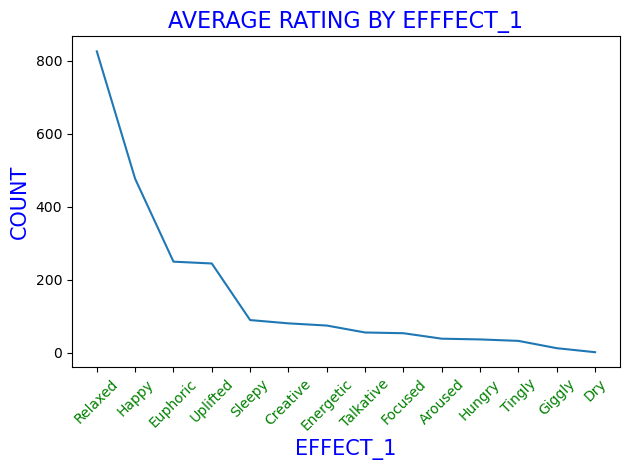

In [53]:
#Visualization of Count by Effect_1.
plt.plot(OD2["effect_1"].value_counts())
plt.xlabel("EFFECT_1", fontsize=15, color="BLUE")
plt.ylabel("COUNT", fontsize=15, color="BLUE")
plt.title('AVERAGE RATING BY EFFFECT_1', color = 'BlUE', fontsize = 16)
plt.xticks(rotation =45, color="green")

plt.tight_layout()
plt.show()

In [54]:
#Find average rating for each effect_1
#What is the average(mean, min, max) Rating reported by Effect?
OD2.groupby("effect_1").Rating.mean()
print(OD2.groupby("effect_1").describe())

          Rating                                                  
           count      mean       std  min    25%   50%    75%  max
effect_1                                                          
Aroused     38.0  4.450000  0.904269  0.0  4.425  4.70  5.000  5.0
Creative    80.0  4.473750  0.611854  0.0  4.275  4.50  4.800  5.0
Dry          1.0  4.000000       NaN  4.0  4.000  4.00  4.000  4.0
Energetic   74.0  4.332432  0.578877  0.0  4.200  4.40  4.600  5.0
Euphoric   249.0  4.425703  0.518510  0.0  4.200  4.40  4.700  5.0
Focused     53.0  4.366038  0.377718  3.4  4.200  4.40  4.700  5.0
Giggly      12.0  4.233333  0.986577  2.0  3.900  4.60  5.000  5.0
Happy      476.0  4.412395  0.297346  3.0  4.300  4.40  4.600  5.0
Hungry      36.0  4.125000  1.100487  0.0  4.000  4.30  4.725  5.0
Relaxed    825.0  4.448364  0.272618  3.0  4.300  4.50  4.600  5.0
Sleepy      89.0  4.291011  0.916223  0.0  4.100  4.40  4.800  5.0
Talkative   55.0  4.376364  0.822364  0.0  4.200  4.50  5.000 

In [55]:
#Use data to get the Rating by EFFECT_1 effect to see if they are consistent. 
#Count for each effect for effect_1 by Type
OD2.groupby(["Type", "effect_1"]).size()

Type    effect_1 
hybrid  Aroused       18
        Creative      47
        Dry            1
        Energetic     32
        Euphoric     136
        Focused       31
        Giggly         5
        Happy        306
        Hungry        18
        Relaxed      356
        Sleepy        34
        Talkative     39
        Tingly        16
        Uplifted     124
indica  Aroused       13
        Creative       8
        Energetic      2
        Euphoric      62
        Focused        5
        Giggly         5
        Happy         56
        Hungry        14
        Relaxed      431
        Sleepy        50
        Talkative      3
        Tingly         9
        Uplifted      22
sativa  Aroused        7
        Creative      25
        Energetic     40
        Euphoric      51
        Focused       17
        Giggly         2
        Happy        114
        Hungry         4
        Relaxed       38
        Sleepy         5
        Talkative     13
        Tingly         7
       

In [56]:
#Is there a significant difference in Rating by Types or Effects (effect_1)?
#What is the average(mean) Rating reported by Type and Effect.
#Count of Rating by effect_1
OD2["Rating"].value_counts()
print(OD2["Rating"].describe())


count    2351.000000
mean        4.310634
std         0.836394
min         0.000000
25%         4.200000
50%         4.400000
75%         4.700000
max         5.000000
Name: Rating, dtype: float64


In [57]:
#Find total Value for each Type 
OD2.Type.value_counts()
print(OD2["Type"].describe())

count       2351
unique         3
top       hybrid
freq        1212
Name: Type, dtype: object


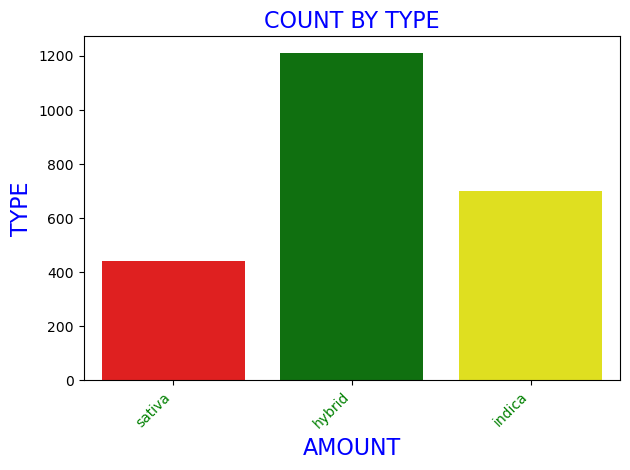

In [58]:
#Visualization of Count by Type
count_types_plot = sns.countplot(x= OD2['Type'], palette=['red','green', 'yellow' ])
count_types_plot.set_xticklabels(count_types_plot.get_xticklabels(), ha="right")
plt.title("COUNT BY TYPE", color = 'BLUE', fontsize = 16)
plt.xlabel('AMOUNT', color = 'BLUE', fontsize = 16)
plt.ylabel('TYPE', color = 'BLUE', fontsize = 16)
plt.xticks(rotation =45, color="green")
plt.tight_layout()
plt.show()

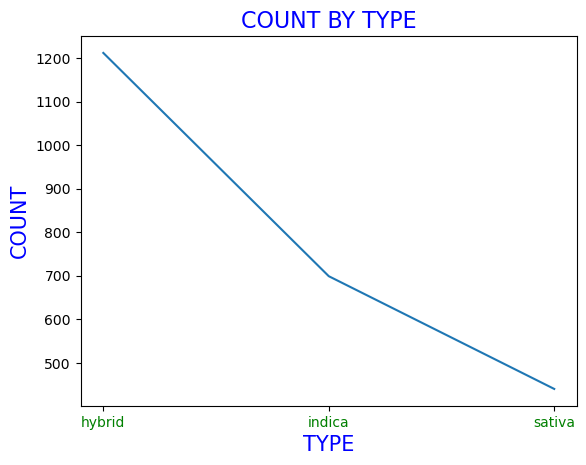

In [36]:
#Visualization of Value Count of each Type
plt.plot(OD2["Type"].value_counts())
plt.xlabel("TYPE", fontsize=15, color="BLUE")
plt.ylabel("COUNT", fontsize=15, color="BLUE")
plt.title('COUNT BY TYPE', color = 'BLUE', fontsize = 16)
plt.xticks(color="green")
plt.show()

        Rating                                              num_effects  \
         count      mean       std  min  25%  50%  75%  max       count   
Type                                                                      
hybrid  1212.0  4.291667  0.885812  0.0  4.2  4.4  4.7  5.0      1163.0   
indica   699.0  4.347783  0.750954  0.0  4.2  4.4  4.7  5.0       680.0   
sativa   440.0  4.303864  0.824847  0.0  4.2  4.4  4.6  5.0       421.0   

                                                     
            mean       std  min  25%  50%  75%  max  
Type                                                 
hybrid  4.914015  0.470655  1.0  5.0  5.0  5.0  5.0  
indica  4.925000  0.418946  1.0  5.0  5.0  5.0  5.0  
sativa  4.952494  0.327508  1.0  5.0  5.0  5.0  5.0  


/var/folders/qd/nz_sk6297w3d7v1mk0dm7jp80000gn/T/ipykernel_81353/487315013.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-ok" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='green', marker='*');
/var/folders/qd/nz_sk6297w3d7v1mk0dm7jp80000gn/T/ipykernel_81353/487315013.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='green', marker='*');


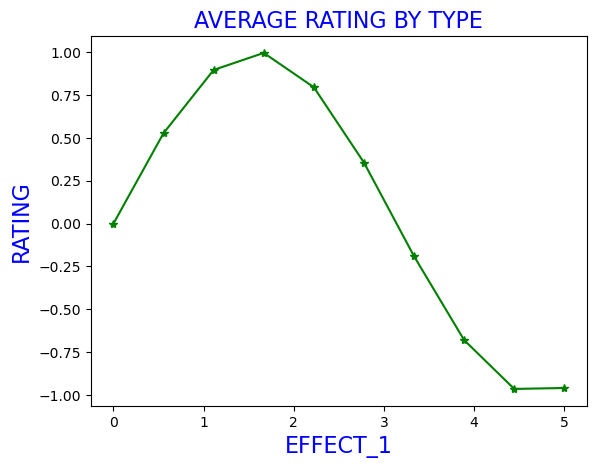

In [37]:
#Find Average Rating for each Type
#What is the average(mean, min, max) Rating reported by Type?
OD2.groupby("Type").Rating.mean()
x = np.linspace(0, 5, 10)
y = np.sin(x)
plt.plot(x, y, '-ok', color='green', marker='*');
plt.title('AVERAGE RATING BY TYPE', color = 'BLUE', fontsize = 16)
plt.xlabel('EFFECT_1', color = 'BLUE', fontsize = 16)
plt.ylabel('RATING', color = 'BLUE', fontsize = 16)
print(OD2.groupby("Type").describe())

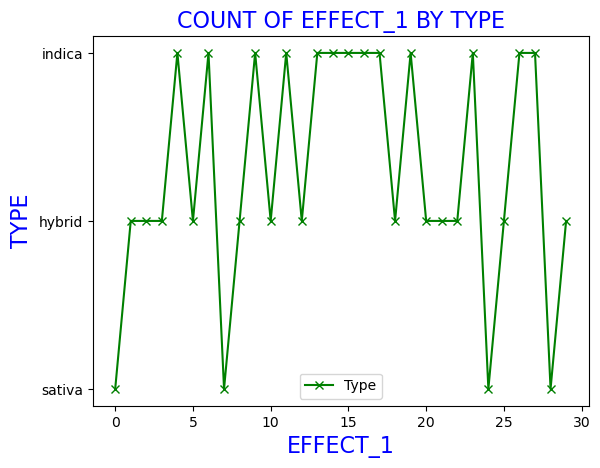

In [21]:
#Visualization Count for each Effect for effect_1 by Type
OD2.groupby(["Type", "effect_1"]).size()
plt.plot(OD2['Type'][:30], marker = 'x', color = 'green', label = 'Type')
plt.title('COUNT OF EFFECT_1 BY TYPE', color = 'BLUE', fontsize = 16)
plt.xlabel('EFFECT_1', color = 'BLUE', fontsize = 16)
plt.ylabel('TYPE', color = 'BLUE', fontsize = 16)
plt.legend()

In [22]:
#Hybrid dataframe Robbins
#Pull Hybrid Type from DF
hybrid_df = OD2.groupby(["Type", "effect_1", "Rating"]).size()
hybrid_2_df=pd.DataFrame(hybrid_df)
hybrid_2_df.head()

0
Type   effect_1 Rating   
hybrid Aroused  3.0     1
                3.6     2
                4.2     1
                4.5     1
                4.7     3

In [24]:
final=hybrid_2_df.loc["hybrid"]
final.head(5)


0
effect_1 Rating   
Aroused  3.0     1
         3.6     2
         4.2     1
         4.5     1
         4.7     3

In [382]:
final=hybrid_2_df.loc["indica"]
final.head(5)


0
effect_1 Rating   
Aroused  3.7     1
         4.0     1
         4.5     4
         4.7     2
         4.8     1

In [383]:
final=hybrid_2_df.loc["sativa"]
final.head(5)


0
effect_1 Rating   
Aroused  0.0     1
         3.5     1
         4.0     1
         4.4     1
         4.7     1

In [385]:
#How does this affect how they rate it? Ex: Hybrid- 13 users said it made them aroused. 
#What is the average rating reported by those 13 people? Repeat for a few more effects in Hybrid, Sativa, then Indica.
#Request the “Rating” of each ‘Effect” by the min to find the Significant Difference by “Rating” of “Effect”
per_all_effect_rating = OD2.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5"])
per_all_effect_rating = per_all_effect_rating["Rating"].max()
per_all_effect_rating


Type    effect_1  effect_2   effect_3   effect_4   effect_5 
hybrid  Aroused   Creative   Energetic  Euphoric   Focused      3.6
                  Energetic  Euphoric   Focused    Relaxed      5.0
                  Euphoric   Focused    Happy      Hungry       5.0
                  Happy      Relaxed    Uplifted   Creative     3.0
                  Sleepy     Tingly     Uplifted   Creative     5.0
                                                               ... 
sativa  Uplifted  Relaxed    Happy      Energetic  Talkative    4.7
                                        Euphoric   Focused      4.6
                                        Focused    Euphoric     4.4
                  Sleepy     Creative   Happy      Talkative    3.9
                             Happy      Relaxed    Focused      4.6
Name: Rating, Length: 1742, dtype: float64

In [386]:
#Request the Average “Rating” of each ‘Effect” by the mean to find the Significant Difference by “Rating” of “Effect”
per_all_effect_rating = OD2.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5"])
per_all_effect_rating = per_all_effect_rating["Rating"].size()
per_all_effect_rating


Type    effect_1  effect_2   effect_3   effect_4   effect_5 
hybrid  Aroused   Creative   Energetic  Euphoric   Focused      1
                  Energetic  Euphoric   Focused    Relaxed      1
                  Euphoric   Focused    Happy      Hungry       1
                  Happy      Relaxed    Uplifted   Creative     1
                  Sleepy     Tingly     Uplifted   Creative     1
                                                               ..
sativa  Uplifted  Relaxed    Happy      Energetic  Talkative    1
                                        Euphoric   Focused      1
                                        Focused    Euphoric     1
                  Sleepy     Creative   Happy      Talkative    1
                             Happy      Relaxed    Focused      1
Name: Rating, Length: 1742, dtype: int64

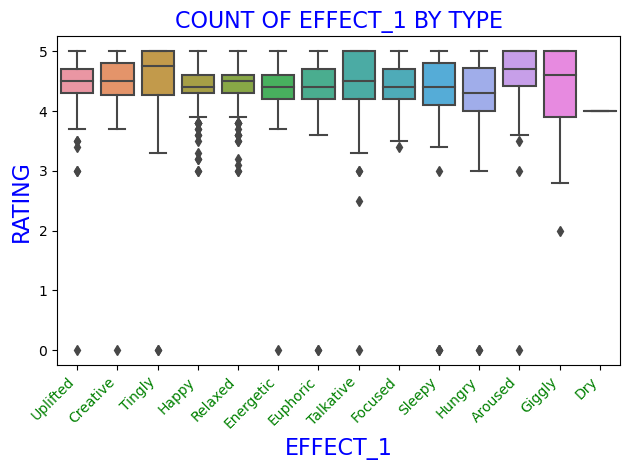

In [387]:
#Create a Box plot to see if Ratings vary depending on the effect (Using effect_1)
box_plot_e1=sns.boxplot(data=OD2, x="effect_1", y="Rating")
box_plot_e1.set_xticklabels(box_plot_e1.get_xticklabels(), ha="right")
plt.xticks(rotation =45, color="green")
plt.title('COUNT OF EFFECT_1 BY TYPE', color = 'BLUE', fontsize = 16)
plt.xlabel('EFFECT_1', color = 'BLUE', fontsize = 16)
plt.ylabel('RATING', color = 'BLUE', fontsize = 16)
plt.tight_layout()
plt.show()

In [388]:
#END N.F.R 11.26.2028 1851CST